In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [4]:
df = pd.read_csv('Газпром МКС_статистика.csv', sep=';')

In [5]:
df

,Месяц,Вид услуги,Услуга,Номер заказа,Дата выписки билета,Тип операции,Сумма итого,Стоимость билета,Сервисный сбор,Сумма штрафа
0,Май,Гостиницы,Гостиницы,a5602e0a-cb24-4df2-ac9e-25bfe3ac7cda,-,Продажа,"1 534,57","0,00","0,00","0,00"
1,Март,Гостиницы,Гостиницы РФ,ТРВ00000007812,-,Продажа,"1 340,00","0,00","0,00","0,00"
2,Март,Гостиницы,Гостиницы РФ,ТРВ00000007812,-,Продажа,"1 340,00","0,00","0,00","0,00"
3,Март,Гостиницы,Гостиницы РФ,ТРВ00000007811,-,Продажа,"1 340,00","0,00","0,00","0,00"
4,Март,Гостиницы,Гостиницы РФ,ТРВ00000007811,-,Продажа,"1 340,00","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...
4779,Апрель,Гостиницы,Гостиницы,422358,-,Продажа,"2 455,75","0,00","0,00","0,00"
4780,Апрель,Гостиницы,Гостиницы,422357,-,Продажа,"2 455,75","0,00","0,00","0,00"
4781,Апрель,Гостиницы,Гостиницы,422348,-,Продажа,"3 815,86","0,00","0,00","0,00"
4782,Апрель,Гостиницы,Гостиницы,409928,-,Продажа,"4 498,14","0,00","0,00","0,00"


In [9]:
del df['Услуга']

In [10]:
del df['Номер заказа']

In [22]:
del df['Стоимость билета']

In [23]:
del df['Сервисный сбор']

In [24]:
del df['Сумма штрафа']

In [17]:
df = df.rename(columns={'Месяц':'month', 'Вид услуги':'type', 'Тип операции':'operation','Сумма итого':'total', 'Дата выписки билета':'date'})

In [28]:
df=df.query('type !="Гостиницы" & type !="Прочие услуги"')

In [33]:
df.dtypes

month        object
type         object
date         object
operation    object
total        object
dtype: object

In [47]:
df['total'] = df.total.str.replace(',','.')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
df['total'] = df.total.str.replace(' ','')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df['total'] = df.total.astype('float')        

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_all = df.query('operation == "Продажа"') \
           .groupby('month', as_index=False) \
           .agg({'type':'count', 'total':'mean'}) \
           .rename(columns={'month':'месяц','type':'кол-во всех перевозок', 'total':'средняя стоимость'}) \
           .round(2)
df_all

,месяц,кол-во всех перевозок,средняя стоимость
0,Август,707,2893.44
1,Апрель,495,2456.80
2,Июль,582,2893.70
3,Июнь,488,2007.39
4,Май,475,2699.09
5,Март,162,6912.85
6,Сентябрь,671,2283.00
7,Февраль,179,5421.41


In [125]:
df_all.to_excel("среднее.xlsx")  

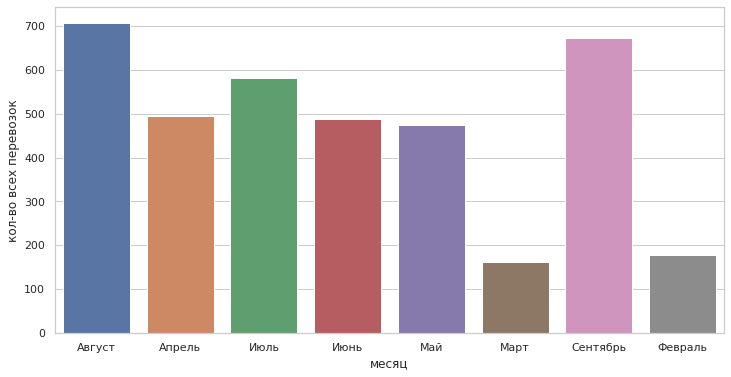

In [124]:
sns.barplot(data = df_all, x='месяц', y='кол-во всех перевозок')

In [131]:
df_avia = df.query('operation == "Продажа" & type == "Авиабилеты"') \
            .groupby('month', as_index=False) \
            .agg({'type':'count', 'total':'mean'}) \
            .rename(columns={'month':'месяц','type':'кол-во авиа перевозок', 'total':'средняя стоимость авиа'}) \
            .round(2)
df_avia

,месяц,кол-во авиа перевозок,средняя стоимость авиа
0,Август,362,4313.07
1,Апрель,271,3447.78
2,Июль,297,4520.90
3,Июнь,164,3639.45
4,Май,284,3580.44
5,Март,126,7616.79
6,Сентябрь,399,3058.27
7,Февраль,108,6534.14


In [129]:
df_avia.to_excel("среднееавиа.xlsx")  

In [132]:
df_zhd = df.query('operation == "Продажа" & type == "Железнодорожные билеты"') \
           .groupby('month', as_index=False) \
           .agg({'type':'count', 'total':'mean'}) \
           .rename(columns={'month':'месяц','type':'кол-во жд перевозок', 'total':'средняя стоимость жд'}) \
           .round(2)
df_zhd

,месяц,кол-во жд перевозок,средняя стоимость жд
0,Август,345,1403.85
1,Апрель,224,1257.88
2,Июль,285,1197.99
3,Июнь,324,1181.29
4,Май,191,1388.60
5,Март,36,4449.08
6,Сентябрь,272,1145.74
7,Февраль,71,3728.81


In [130]:
df_zhd.to_excel("среднеежд.xlsx")  

In [144]:
df_1 = df.query('operation == "Продажа" & type == "Железнодорожные билеты"') \
  .groupby('month', as_index=False) \
  .agg({'total':'sum'}) \
  .rename(columns={'month':'месяц','total':'ИТОГО'}) \
  .round(2)
df_1

,месяц,ИТОГО
0,Август,484329.3
1,Апрель,281765.9
2,Июль,341425.9
3,Июнь,382737.3
4,Май,265223.5
5,Март,160167.0
6,Сентябрь,311641.6
7,Февраль,264745.6


In [136]:
total_df = df_all.merge(df_avia, how='left')
total_df

,месяц,кол-во всех перевозок,средняя стоимость,кол-во авиа перевозок,средняя стоимость авиа
0,Август,707,2893.44,362,4313.07
1,Апрель,495,2456.80,271,3447.78
2,Июль,582,2893.70,297,4520.90
3,Июнь,488,2007.39,164,3639.45
4,Май,475,2699.09,284,3580.44
5,Март,162,6912.85,126,7616.79
6,Сентябрь,671,2283.00,399,3058.27
7,Февраль,179,5421.41,108,6534.14


In [137]:
total_df = total_df.merge(df_zhd, how='left')

In [138]:
total_df

,месяц,кол-во всех перевозок,средняя стоимость,кол-во авиа перевозок,средняя стоимость авиа,кол-во жд перевозок,средняя стоимость жд
0,Август,707,2893.44,362,4313.07,345,1403.85
1,Апрель,495,2456.80,271,3447.78,224,1257.88
2,Июль,582,2893.70,297,4520.90,285,1197.99
3,Июнь,488,2007.39,164,3639.45,324,1181.29
4,Май,475,2699.09,284,3580.44,191,1388.60
5,Март,162,6912.85,126,7616.79,36,4449.08
6,Сентябрь,671,2283.00,399,3058.27,272,1145.74
7,Февраль,179,5421.41,108,6534.14,71,3728.81


In [145]:
total_df = total_df.merge(df_1, how='left')

In [146]:
total_df

,месяц,кол-во всех перевозок,средняя стоимость,кол-во авиа перевозок,средняя стоимость авиа,кол-во жд перевозок,средняя стоимость жд,ИТОГО
0,Август,707,2893.44,362,4313.07,345,1403.85,484329.3
1,Апрель,495,2456.80,271,3447.78,224,1257.88,281765.9
2,Июль,582,2893.70,297,4520.90,285,1197.99,341425.9
3,Июнь,488,2007.39,164,3639.45,324,1181.29,382737.3
4,Май,475,2699.09,284,3580.44,191,1388.60,265223.5
5,Март,162,6912.85,126,7616.79,36,4449.08,160167.0
6,Сентябрь,671,2283.00,399,3058.27,272,1145.74,311641.6
7,Февраль,179,5421.41,108,6534.14,71,3728.81,264745.6


In [147]:
total_df.to_excel("билеты_пакспорт.xlsx")  